<a href="https://colab.research.google.com/github/koushikreddy30-26/ML-tasks/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('/content/fraudTrain.csv')

print("### First 5 rows of train_df:")
print(train_df.head())

print("\n### Info of train_df:")
train_df.info()

print("\n### Descriptive statistics of train_df:")
print(train_df.describe())

### First 5 rows of train_df:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 R

In [27]:
test_df = pd.read_csv('/content/fraudTest.csv')

print("### First 5 rows of test_df:")
print(test_df.head())

print("\n### Info of test_df:")
test_df.info()

print("\n### Descriptive statistics of test_df:")
print(test_df.describe())

### First 5 rows of test_df:
   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2020-06-21 12:14:25  2.291164e+15   
1           1   2020-06-21 12:14:33  3.573030e+15   
2           2   2020-06-21 12:14:53  3.598215e+15   
3           3   2020-06-21 12:15:15  3.591920e+15   
4           4   2020-06-21 12:15:17  3.526826e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.

### Missing values in train_df:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

### Info of train_df (re-displaying for data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178594 entries, 0 to 178593
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             178594 non-null  int64  
 1   trans

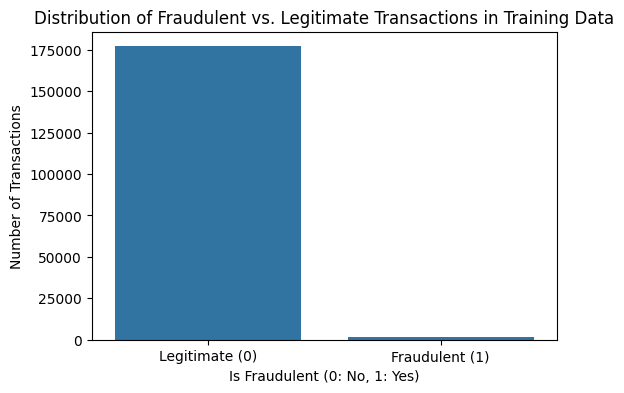

In [28]:
print("### Missing values in train_df:")
print(train_df.isnull().sum())

print("\n### Info of train_df (re-displaying for data types):")
train_df.info()

print("\n### Distribution of 'is_fraud' in train_df:")
fraud_distribution = train_df['is_fraud'].value_counts()
print(fraud_distribution)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_distribution.index, y=fraud_distribution.values)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions in Training Data')
plt.xlabel('Is Fraudulent (0: No, 1: Yes)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

In [29]:
columns_to_drop = ['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street', 'job', 'merchant', 'city']

train_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Columns after dropping from train_df:")
print(train_df.columns)

print("\nColumns after dropping from test_df:")
print(test_df.columns)

Columns after dropping from train_df:
Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'state', 'zip',
       'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Columns after dropping from test_df:
Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'state', 'zip',
       'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


**Reasoning**:
I will now remove rows with missing values from both dataframes, convert the 'is_fraud' column to integer type, convert date columns to datetime objects, extract time-based features, and calculate the 'age' feature from 'dob', then drop the original datetime columns.



In [30]:
print('Shape of train_df before dropping missing values:', train_df.shape)
print('Shape of test_df before dropping missing values:', test_df.shape)

# Drop rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

print('Shape of train_df after dropping missing values:', train_df.shape)
print('Shape of test_df after dropping missing values:', test_df.shape)

# Convert 'is_fraud' to integer type
train_df['is_fraud'] = train_df['is_fraud'].astype(int)

# Convert 'trans_date_trans_time' and 'dob' to datetime objects
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

# Extract new numerical features from 'trans_date_trans_time'
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek
train_df['month'] = train_df['trans_date_trans_time'].dt.month

test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['day_of_week'] = test_df['trans_date_trans_time'].dt.dayofweek
test_df['month'] = test_df['trans_date_trans_time'].dt.month

# Calculate 'age' feature
current_year = 2020
train_df['age'] = current_year - train_df['dob'].dt.year
test_df['age'] = current_year - test_df['dob'].dt.year

# Drop original datetime columns
train_df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)
test_df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

print('\nTrain_df columns after datetime processing:')
print(train_df.columns)
print('\nTest_df columns after datetime processing:')
print(test_df.columns)

print('\nInfo of train_df after preprocessing:')
train_df.info()
print('\nInfo of test_df after preprocessing:')
test_df.info()

Shape of train_df before dropping missing values: (178594, 14)
Shape of test_df before dropping missing values: (182428, 14)
Shape of train_df after dropping missing values: (178593, 14)
Shape of test_df after dropping missing values: (182427, 14)

Train_df columns after datetime processing:
Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'day_of_week', 'month', 'age'],
      dtype='object')

Test_df columns after datetime processing:
Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'day_of_week', 'month', 'age'],
      dtype='object')

Info of train_df after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 178593 entries, 0 to 178592
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     

In [31]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from train_df
X = train_df.drop('is_fraud', axis=1)
y = train_df['is_fraud']

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns for preprocessing
categorical_cols = ['category', 'gender', 'state', 'hour', 'day_of_week', 'month']
numerical_cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age']

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"Test_df shape (features only): {test_df.drop('is_fraud', axis=1).shape}")

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

X_train shape: (142874, 15)
X_val shape: (35719, 15)
y_train shape: (142874,)
y_val shape: (35719,)
Test_df shape (features only): (182427, 15)

Categorical columns: ['category', 'gender', 'state', 'hour', 'day_of_week', 'month']
Numerical columns: ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age']


In [32]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform on X_train, and convert to dense array
X_train_processed = preprocessor.fit_transform(X_train).toarray()

# Transform X_val and test_df, and convert to dense array
X_val_processed = preprocessor.transform(X_val).toarray()
X_test_processed = preprocessor.transform(test_df.drop('is_fraud', axis=1)).toarray()

# Get feature names after one-hot encoding
# The numerical features retain their names, and categorical features get new names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Convert processed arrays back to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=feature_names, index=X_val.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=test_df.index)

print("Shape of X_train_processed_df:", X_train_processed_df.shape)
print("Shape of X_val_processed_df:", X_val_processed_df.shape)
print("Shape of X_test_processed_df:", X_test_processed_df.shape)

print("\nFirst 5 rows of X_train_processed_df:")
print(X_train_processed_df.head())

print("\nFirst 5 rows of X_test_processed_df:")
print(X_test_processed_df.head())

Shape of X_train_processed_df: (142874, 110)
Shape of X_val_processed_df: (35719, 110)
Shape of X_test_processed_df: (182427, 110)

First 5 rows of X_train_processed_df:
             amt       zip       lat      long  city_pop  unix_time  \
154249 -0.131541  0.379666  1.329619 -1.359216 -0.291568   1.210806   
51331   5.196999 -1.222002  0.379003  0.814334 -0.293288  -0.732252   
104766 -0.385665 -1.346326  0.575454  1.166467 -0.288902   0.414724   
2249   -0.413004  0.941517 -0.488715 -0.425197  1.061591  -1.800170   
1702   -0.359733 -0.560804 -2.117119  0.544291  0.823447  -1.807003   

        merch_lat  merch_long       age  category_entertainment  ...  \
154249   1.508479   -1.375506 -0.273979                     0.0  ...   
51331    0.298600    0.871706  0.071015                     0.0  ...   
104766   0.404866    1.107595  2.083479                     0.0  ...   
2249    -0.612997   -0.430816  0.128514                     0.0  ...   
1702    -2.167217    0.493981 -0.906468    

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform on X_train, and convert to dense array
X_train_processed = preprocessor.fit_transform(X_train).toarray()

# Transform X_val and test_df, and convert to dense array
X_val_processed = preprocessor.transform(X_val).toarray()
X_test_processed = preprocessor.transform(test_df.drop('is_fraud', axis=1)).toarray()

# Get feature names after one-hot encoding
# The numerical features retain their names, and categorical features get new names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Convert processed arrays back to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=feature_names, index=X_val.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=test_df.index)

print("Shape of X_train_processed_df:", X_train_processed_df.shape)
print("Shape of X_val_processed_df:", X_val_processed_df.shape)
print("Shape of X_test_processed_df:", X_test_processed_df.shape)

print("\nFirst 5 rows of X_train_processed_df:")
print(X_train_processed_df.head())

print("\nFirst 5 rows of X_test_processed_df:")
print(X_test_processed_df.head())

Shape of X_train_processed_df: (142874, 110)
Shape of X_val_processed_df: (35719, 110)
Shape of X_test_processed_df: (182427, 110)

First 5 rows of X_train_processed_df:
             amt       zip       lat      long  city_pop  unix_time  \
154249 -0.131541  0.379666  1.329619 -1.359216 -0.291568   1.210806   
51331   5.196999 -1.222002  0.379003  0.814334 -0.293288  -0.732252   
104766 -0.385665 -1.346326  0.575454  1.166467 -0.288902   0.414724   
2249   -0.413004  0.941517 -0.488715 -0.425197  1.061591  -1.800170   
1702   -0.359733 -0.560804 -2.117119  0.544291  0.823447  -1.807003   

        merch_lat  merch_long       age  category_entertainment  ...  \
154249   1.508479   -1.375506 -0.273979                     0.0  ...   
51331    0.298600    0.871706  0.071015                     0.0  ...   
104766   0.404866    1.107595  2.083479                     0.0  ...   
2249    -0.612997   -0.430816  0.128514                     0.0  ...   
1702    -2.167217    0.493981 -0.906468    

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform on X_train, and convert to dense array
X_train_processed = preprocessor.fit_transform(X_train).toarray()

# Transform X_val and test_df, and convert to dense array
X_val_processed = preprocessor.transform(X_val).toarray()
X_test_processed = preprocessor.transform(test_df.drop('is_fraud', axis=1)).toarray()

# Get feature names after one-hot encoding
# The numerical features retain their names, and categorical features get new names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Convert processed arrays back to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=feature_names, index=X_val.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=test_df.index)

print("Shape of X_train_processed_df:", X_train_processed_df.shape)
print("Shape of X_val_processed_df:", X_val_processed_df.shape)
print("Shape of X_test_processed_df:", X_test_processed_df.shape)

print("\nFirst 5 rows of X_train_processed_df:")
print(X_train_processed_df.head())

print("\nFirst 5 rows of X_test_processed_df:")
print(X_test_processed_df.head())

Shape of X_train_processed_df: (142874, 110)
Shape of X_val_processed_df: (35719, 110)
Shape of X_test_processed_df: (182427, 110)

First 5 rows of X_train_processed_df:
             amt       zip       lat      long  city_pop  unix_time  \
154249 -0.131541  0.379666  1.329619 -1.359216 -0.291568   1.210806   
51331   5.196999 -1.222002  0.379003  0.814334 -0.293288  -0.732252   
104766 -0.385665 -1.346326  0.575454  1.166467 -0.288902   0.414724   
2249   -0.413004  0.941517 -0.488715 -0.425197  1.061591  -1.800170   
1702   -0.359733 -0.560804 -2.117119  0.544291  0.823447  -1.807003   

        merch_lat  merch_long       age  category_entertainment  ...  \
154249   1.508479   -1.375506 -0.273979                     0.0  ...   
51331    0.298600    0.871706  0.071015                     0.0  ...   
104766   0.404866    1.107595  2.083479                     0.0  ...   
2249    -0.612997   -0.430816  0.128514                     0.0  ...   
1702    -2.167217    0.493981 -0.906468    

In [36]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train_processed_df, y_train)

# Print the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Print the value counts of y_resampled to verify class balance
print("\nValue counts of y_resampled:")
print(y_resampled.value_counts())

Shape of X_resampled: (283288, 110)
Shape of y_resampled: (283288,)

Value counts of y_resampled:
is_fraud
0    141644
1    141644
Name: count, dtype: int64


Training Logistic Regression Model...
### Logistic Regression Evaluation:
Accuracy: 0.8869
Precision: 0.0634
Recall: 0.8827
F1-Score: 0.1183
ROC-AUC: 0.9539


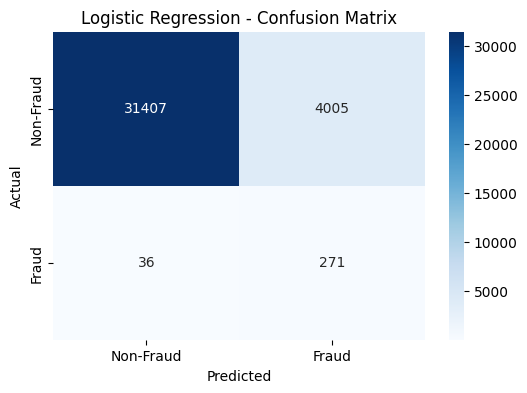

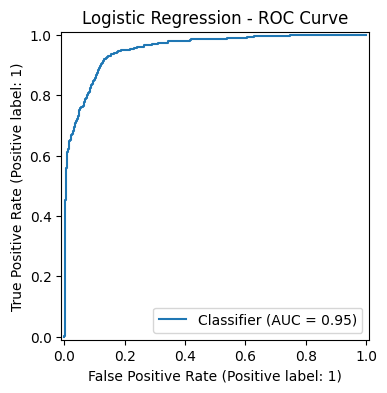


--------------------------------------------------



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred, y_pred_proba):
    print(f"### {model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 4))
    RocCurveDisplay.from_predictions(y_true, y_pred_proba, ax=plt.gca())
    plt.title(f'{model_name} - ROC Curve')
    plt.show()
    print("\n" + "-"*50 + "\n")

# 1. Logistic Regression
print("Training Logistic Regression Model...")
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_resampled, y_resampled)

y_pred_log_reg = log_reg.predict(X_val_processed_df)
y_pred_proba_log_reg = log_reg.predict_proba(X_val_processed_df)[:, 1]

evaluate_model("Logistic Regression", y_val, y_pred_log_reg, y_pred_proba_log_reg)

Training Decision Tree Classifier Model...
### Decision Tree Classifier Evaluation:
Accuracy: 0.9946
Precision: 0.6619
Recall: 0.7524
F1-Score: 0.7043
ROC-AUC: 0.8746


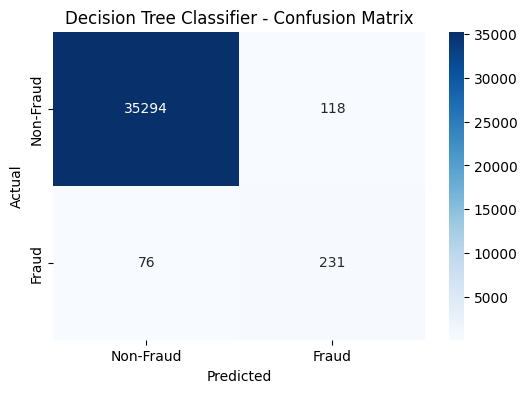

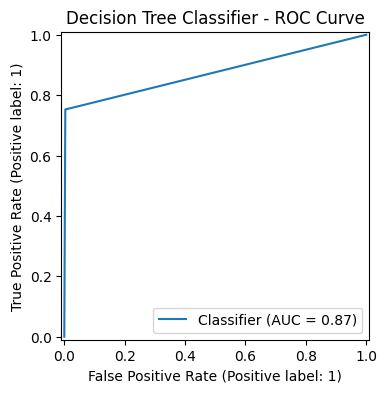


--------------------------------------------------



In [38]:
print("Training Decision Tree Classifier Model...")
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_resampled, y_resampled)

y_pred_dec_tree = dec_tree.predict(X_val_processed_df)
y_pred_proba_dec_tree = dec_tree.predict_proba(X_val_processed_df)[:, 1]

evaluate_model("Decision Tree Classifier", y_val, y_pred_dec_tree, y_pred_proba_dec_tree)

Training Random Forest Classifier Model...
### Random Forest Classifier Evaluation:
Accuracy: 0.9964
Precision: 0.9492
Recall: 0.6091
F1-Score: 0.7421
ROC-AUC: 0.9887


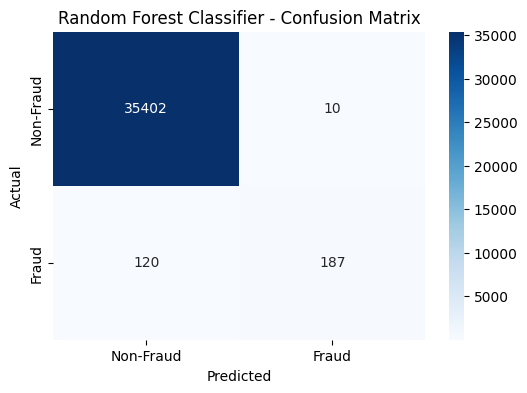

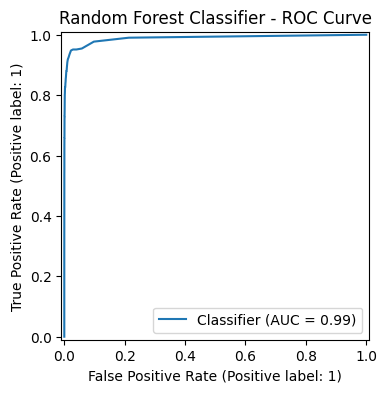


--------------------------------------------------



In [40]:
print("Training Random Forest Classifier Model...")
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_resampled, y_resampled)

y_pred_random_forest = random_forest.predict(X_val_processed_df)
y_pred_proba_random_forest = random_forest.predict_proba(X_val_processed_df)[:, 1]

evaluate_model("Random Forest Classifier", y_val, y_pred_random_forest, y_pred_proba_random_forest)

Evaluating Random Forest Classifier on the test set...
### Random Forest Classifier (Test Set) Evaluation:
Accuracy: 0.9976
Precision: 0.9564
Recall: 0.4523
F1-Score: 0.6142
ROC-AUC: 0.9658


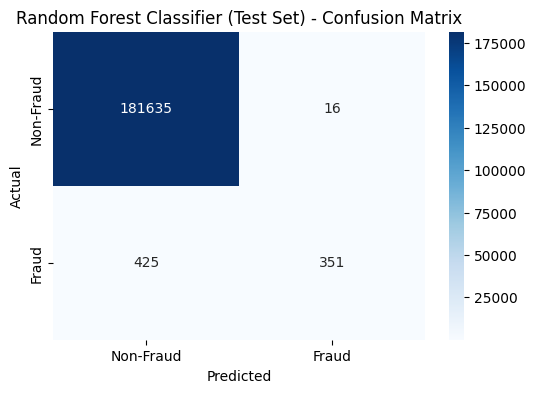

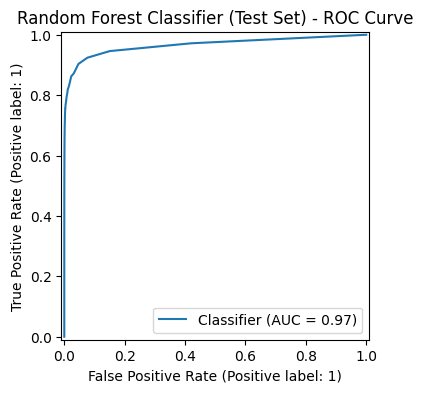


--------------------------------------------------



In [41]:
print("Evaluating Random Forest Classifier on the test set...")

# Make predictions on the test set using the best model (Random Forest)
y_pred_test = random_forest.predict(X_test_processed_df)
y_pred_proba_test = random_forest.predict_proba(X_test_processed_df)[:, 1]

# Evaluate the model on the test set
evaluate_model("Random Forest Classifier (Test Set)", test_df['is_fraud'], y_pred_test, y_pred_proba_test)